# CIC-MalMem-2022 Answer File

### Author: Ruba Al Omari (change this to your name in your submission)

**CIC-MalMem-2022 Original Dataset Source:  University of New Brunswick | UNB - Canadian Institute for Cybersecurity . https://www.unb.ca/cic/datasets/malmem-2022.html**


**CIC-MalMem-2022 Modified Dataset: https://raw.githubusercontent.com/rubaomari/mal/refs/heads/main/CIC-MalMem-2022-Modified-RA.csv**

In [1]:
# import libraries
# you can install missing libraries using pip install, example: pip install numpy

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Tip: If you get future warnings you can ignore them using:

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Task 1-Exploratory Data Analysis 

<span style="color: yellow;">15 Marks, 3 marks per step from step1 to step5</span>


Load the dataset using Pandas into a DataFrame, which is the object Pandas uses to store tables of data.
Pandas uses two objects for storing datasets: the DataFrame and the Series. 
Series is used for datasets with only one column, and DataFrame is used for datasets of more than one column.

### 1. Load the dataset

In [2]:
# load the dataset
url = "https://raw.githubusercontent.com/rubaomari/mal/refs/heads/main/CIC-MalMem-2022-Modified-RA.csv"
malware_df = pd.read_csv(url, sep=",")

# let's create a backup copy of the dataset
malware_df_backup = malware_df.copy()

### 2. Take a quick look at the data structure


#### Use head() to look at the first 5 rows, you can also choose to look at more than the first 5 rows using head(10).


In [3]:
malware_df.head(5)

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


#### Use describe() method to see a summary of the numerical attributes.

In [4]:
malware_df.describe()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
count,58596.000000,58596.000000,58589.000000,58596.0,58596.000000,58596.000000,58596.000000,5.859600e+04,58596.000000,58596.0,...,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,58596.000000
mean,41.394771,14.713837,11.341492,0.0,247.509819,1810.805447,43.707806,1.025858e+04,249.560958,0.0,...,391.347549,221.406581,25.996245,25.063417,116.879514,0.0,121.995546,86.905659,0.000853,7.999881
std,5.777249,2.656748,1.588203,0.0,111.857790,329.782639,5.742023,4.866864e+03,145.999866,0.0,...,4.529704,1.991087,0.170790,1.529628,1.550401,0.0,2.822858,3.134117,0.029199,0.010929
min,21.000000,8.000000,1.650000,0.0,34.962500,670.000000,7.333333,3.514000e+03,71.139241,0.0,...,94.000000,55.000000,6.000000,7.000000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000
25%,40.000000,12.000000,9.972973,0.0,208.725000,1556.000000,38.833333,8.393000e+03,209.648228,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,121.000000,87.000000,0.000000,8.000000
50%,41.000000,15.000000,11.000000,0.0,243.963710,1735.000000,42.781524,9.287500e+03,247.208951,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,122.000000,87.000000,0.000000,8.000000
75%,43.000000,16.000000,12.861858,0.0,289.974322,2087.000000,49.605280,1.219300e+04,291.355050,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,123.000000,88.000000,0.000000,8.000000
max,240.000000,72.000000,16.818182,0.0,24845.951220,3443.000000,53.170732,1.047310e+06,33784.193550,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,129.000000,89.000000,1.000000,8.000000


#### Use info() to get a quick description of the data, the total number of rows, each attribute’s type, and the number of non-null values.

The original dataset from UNB doesn't have any missing values. I have randomly removed values so we can discuss what to do with missing data.

In [5]:
malware_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58594 non-null  object 
 1   pslist.nproc                            58596 non-null  int64  
 2   pslist.nppid                            58596 non-null  int64  
 3   pslist.avg_threads                      58589 non-null  float64
 4   pslist.nprocs64bit                      58596 non-null  int64  
 5   pslist.avg_handlers                     58596 non-null  float64
 6   dlllist.ndlls                           58596 non-null  int64  
 7   dlllist.avg_dlls_per_proc               58596 non-null  float64
 8   handles.nhandles                        58596 non-null  int64  
 9   handles.avg_handles_per_proc            58596 non-null  float64
 10  handles.nport                           58596 non-null  in

#### Use value_counts to show what categories exist and how many rows belong to each Category and to each Class

In [6]:
malware_df["Class"].value_counts()

Class
Benign     29298
Malware    29298
Name: count, dtype: int64

In [7]:
print(malware_df["Class"].value_counts())

Class
Benign     29298
Malware    29298
Name: count, dtype: int64


### 3. Plot a pie of the data classes

<Axes: ylabel='count'>

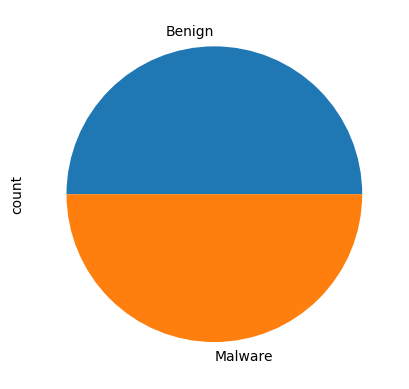

In [8]:
malware_df["Class"].value_counts().plot(kind="pie")

### 4. Plot a a histogram of the features

array([[<Axes: title={'center': 'pslist.nproc'}>,
        <Axes: title={'center': 'pslist.nppid'}>,
        <Axes: title={'center': 'pslist.avg_threads'}>,
        <Axes: title={'center': 'pslist.nprocs64bit'}>,
        <Axes: title={'center': 'pslist.avg_handlers'}>,
        <Axes: title={'center': 'dlllist.ndlls'}>,
        <Axes: title={'center': 'dlllist.avg_dlls_per_proc'}>],
       [<Axes: title={'center': 'handles.nhandles'}>,
        <Axes: title={'center': 'handles.avg_handles_per_proc'}>,
        <Axes: title={'center': 'handles.nport'}>,
        <Axes: title={'center': 'handles.nfile'}>,
        <Axes: title={'center': 'handles.nevent'}>,
        <Axes: title={'center': 'handles.ndesktop'}>,
        <Axes: title={'center': 'handles.nkey'}>],
       [<Axes: title={'center': 'handles.nthread'}>,
        <Axes: title={'center': 'handles.ndirectory'}>,
        <Axes: title={'center': 'handles.nsemaphore'}>,
        <Axes: title={'center': 'handles.ntimer'}>,
        <Axes: title

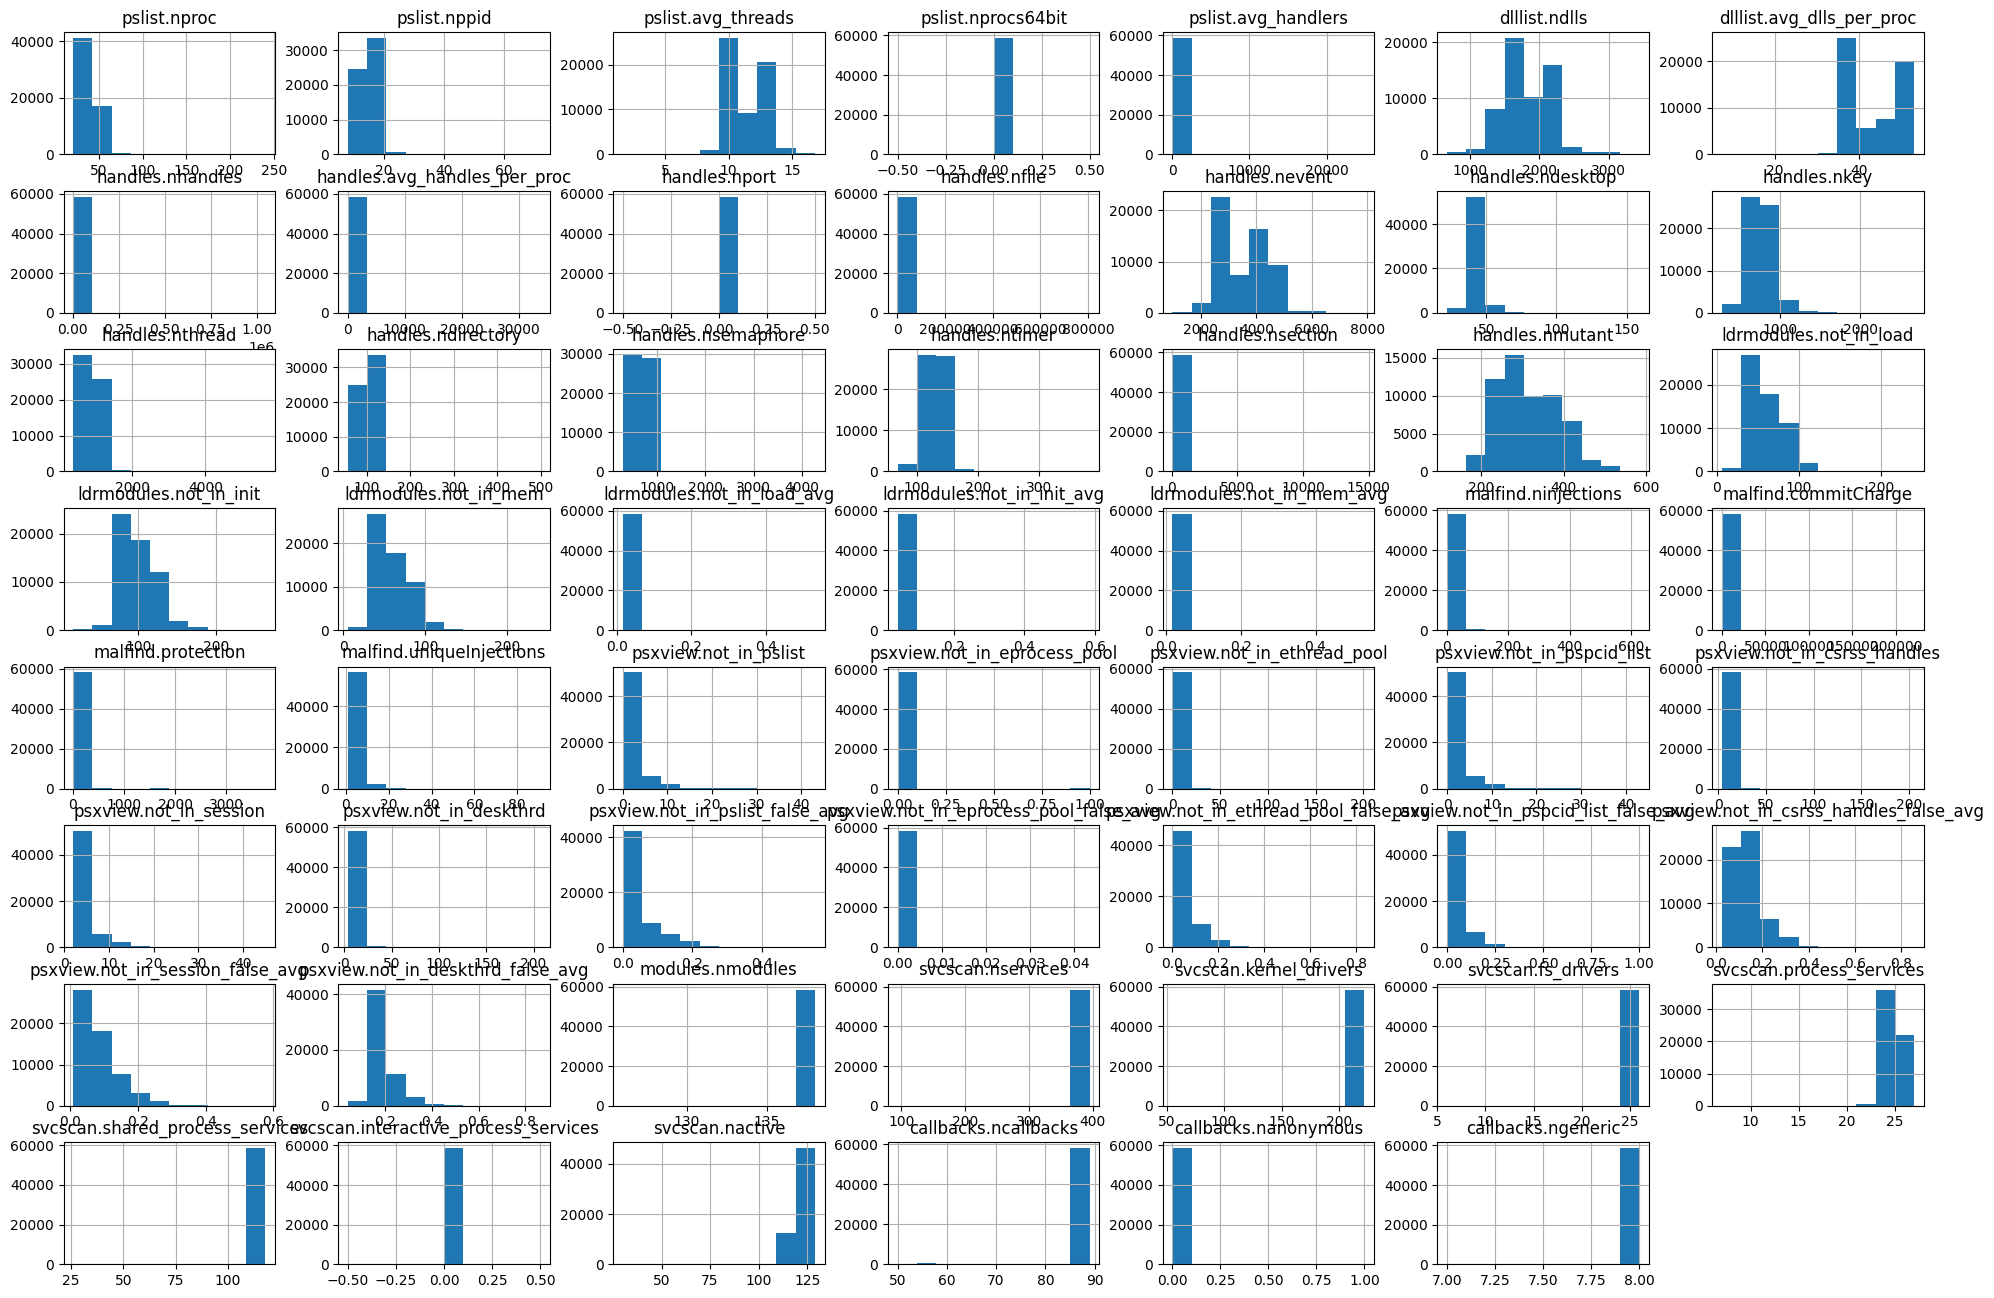

In [9]:
malware_df.hist(figsize=(24, 16))

### 5. Look for correlations using Pearson correlation coefficient.

In [10]:
corr_matrix = malware_df.corr(numeric_only=True)
corr_matrix

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
pslist.nproc,1.000000,0.485450,-0.208977,NaN,-0.004850,0.567111,-0.006901,0.207611,0.021915,NaN,...,0.119179,0.079452,-0.003133,0.027375,0.221725,NaN,0.431282,-0.053061,-0.030426,0.008045
pslist.nppid,0.485450,1.000000,-0.726754,NaN,-0.224777,-0.094653,-0.594012,-0.093094,-0.160602,NaN,...,-0.354249,-0.111617,-0.016397,-0.652891,-0.244422,NaN,0.005160,-0.239525,-0.010932,0.002349
pslist.avg_threads,-0.208977,-0.726754,1.000000,NaN,0.332642,0.556816,0.904924,0.281213,0.242176,NaN,...,0.551201,0.225697,0.026714,0.804710,0.522766,NaN,0.347857,0.298616,-0.007509,0.009647
pslist.nprocs64bit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pslist.avg_handlers,-0.004850,-0.224777,0.332642,NaN,1.000000,0.275566,0.360883,0.971557,0.992540,NaN,...,0.239654,0.105178,0.010450,0.317883,0.250562,NaN,0.204127,0.069981,-0.010605,0.007308
dlllist.ndlls,0.567111,-0.094653,0.556816,NaN,0.275566,1.000000,0.778771,0.427131,0.211031,NaN,...,0.584471,0.299932,0.045204,0.645479,0.681809,NaN,0.752189,0.198395,-0.040057,0.026202
dlllist.avg_dlls_per_proc,-0.006901,-0.594012,0.904924,NaN,0.360883,0.778771,1.000000,0.365824,0.264175,NaN,...,0.664838,0.309271,0.049770,0.861711,0.689500,NaN,0.572227,0.307340,-0.025459,0.022666
handles.nhandles,0.207611,-0.093094,0.281213,NaN,0.971557,0.427131,0.365824,1.000000,0.967002,NaN,...,0.266710,0.128301,0.012881,0.310691,0.307211,NaN,0.321916,0.056964,-0.018165,0.009566
handles.avg_handles_per_proc,0.021915,-0.160602,0.242176,NaN,0.992540,0.211031,0.264175,0.967002,1.000000,NaN,...,0.177340,0.074514,0.002843,0.237993,0.187618,NaN,0.155814,0.037261,-0.008355,0.003216
handles.nport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Task 2-Prepare the Data for ML Algorithms

<span style="color: yellow;">24 Marks, 3 marks per step from step6 to step13</span>

### 6. Extract malware category and malware family from the unique identifiers.


In [11]:
# Catagory is formatted as MalwareCategory-MalwareFamily-MalwareID
# Let's extract the MalwareCategory, MalwareFamily from the Catagory column
malware_df["MalwareCategory"] = malware_df["Category"].str.split("-").str[0]
malware_df["MalwareFamily"] = malware_df["Category"].str.split("-").str[1]

In [12]:
# run the code below to see your extraction succeeded, the name of your dataframe might be different.
print(malware_df.columns)
malware_df.head()

Index(['Category', 'pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.nprocs64bit', 'pslist.avg_handlers', 'dlllist.ndlls',
       'dlllist.avg_dlls_per_proc', 'handles.nhandles',
       'handles.avg_handles_per_proc', 'handles.nport', 'handles.nfile',
       'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.ninjections',
       'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
       'psxview.not_in_session', 'psxview.not_in_deskthrd',
       'psxv

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class,MalwareCategory,MalwareFamily
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,24,116,0,121,87,0,8,Benign,Benign,NaN
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,24,118,0,122,87,0,8,Benign,Benign,NaN
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,27,118,0,120,88,0,8,Benign,Benign,NaN
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,27,118,0,120,88,0,8,Benign,Benign,NaN
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,24,118,0,124,87,0,8,Benign,Benign,NaN


### 7. Check for duplicate rows, and remove them if any.

In [13]:
malware_df.duplicated().sum()

np.int64(534)

In [14]:
malware_df.drop_duplicates(inplace=True)

### 8. Handle the missing values
we will handle the missing values in the preprocessing pipeline, but for now let's have a look to see if we have missing values.

In [15]:
malware_df.isna().sum()

Category                                      2
pslist.nproc                                  0
pslist.nppid                                  0
pslist.avg_threads                            7
pslist.nprocs64bit                            0
pslist.avg_handlers                           0
dlllist.ndlls                                 0
dlllist.avg_dlls_per_proc                     0
handles.nhandles                              0
handles.avg_handles_per_proc                  0
handles.nport                                 0
handles.nfile                                 0
handles.nevent                                0
handles.ndesktop                              8
handles.nkey                                  0
handles.nthread                               0
handles.ndirectory                            0
handles.nsemaphore                            0
handles.ntimer                                0
handles.nsection                              0
handles.nmutant                         

For the missing values, we will fill the mean if it is a numerical column and the most frequent if it is a categorical column.

We will do this through creating a pipeline, that will also scale the features and perform encoding in the next step.




### 9. Drop Category, pslist.nprocs64bit, handles.nport, and svcscan.interactive_process_services features

**Note** You can also drop columns with a specific percent of missing values, for example the below command will drop columns that has 70% (or more) missing values

    - dataset.dropna(axis='columns', thresh=int(0.7* df.shape[0]))

In [16]:
malware_df.drop(
    columns=[
        "Category",
        "pslist.nprocs64bit",
        "handles.nport",
        "svcscan.interactive_process_services",
    ],
    inplace=True,
)

### 10. Create and apply a preprocessing pipeline:

1. Fill in the missing numerical values with the mean using a SimpleImputer

2. Scale the numerical columns using StandardScaler.

3. Fill in the missing categorical values with the most_frequent value using SimpleImputer

In [17]:
# create the pipleline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#create the cat and num columns
num_cols = malware_df.select_dtypes(include='number').columns.to_list()
cat_cols = malware_df.select_dtypes(exclude='number').columns.to_list()

#create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'))


#use ColumnTransformer to set the estimators and transformations
preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )

In [18]:
# apply the pipeline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#apply the preprocessing pipeline on the dataset
malware_df_prepared = preprocessing.fit_transform(malware_df)

#Scikit-learn strips the column headers in most cases, so just add them back on afterward.
feature_names=[]
for name, pipeline, columns in preprocessing.transformers_:
       if name != 'remainder':  # Skip the 'remainder' transformer
        feature_names.extend(columns)

# Convert the transformed data back to a DataFrame with original column names
malware_df_prepared = pd.DataFrame(data=malware_df_prepared, columns=feature_names)
malware_df_prepared


,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nfile,handles.nevent,...,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class,MalwareCategory,MalwareFamily
0,0.621761,0.860691,-0.500642,-0.400394,-0.360646,-0.914062,-0.234442,-0.256131,-0.067013,-0.517525,...,0.022084,-0.699802,-0.572097,-0.358734,0.027941,-0.029358,0.010981,Benign,Benign,Transponder
1,0.967909,1.612239,0.11437,-0.049592,0.79138,0.066666,0.227421,-0.051971,-0.017709,0.227369,...,0.022084,-0.699802,0.717211,-0.004062,0.027941,-0.029358,0.010981,Benign,Benign,Transponder
2,-0.24361,-0.266631,2.125702,0.360001,0.360886,0.793776,0.256902,0.261728,0.043196,0.519119,...,0.022084,1.259716,0.717211,-0.713406,0.348939,-0.029358,0.010981,Benign,Benign,Transponder
3,-1.628203,-0.642405,1.354072,0.14676,-1.115527,0.245917,-0.372018,0.098411,-0.078614,-0.765823,...,0.022084,1.259716,0.717211,-0.713406,0.348939,-0.029358,0.010981,Benign,Benign,Transponder
4,0.102538,0.484917,0.064271,0.298625,0.770159,0.953108,0.315659,0.214721,0.002013,0.317998,...,0.022084,-0.699802,0.717211,0.705281,0.027941,-0.029358,0.010981,Benign,Benign,Transponder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58057,-0.762832,0.109143,-0.78249,-0.287804,-1.091274,-0.779828,-0.471106,-0.234412,-0.078614,-0.942114,...,0.022084,-0.699802,-0.572097,-0.713406,-0.293057,-0.029358,0.010981,Malware,Ransomware,Shade
58058,-0.762832,-0.266631,-0.884636,-0.51286,-1.412629,-1.279085,-0.662525,-0.406778,-0.086445,-1.469747,...,0.022084,-0.699802,-0.572097,-2.132092,0.348939,-0.029358,0.010981,Malware,Ransomware,Shade
58059,-0.589758,0.109143,-0.950046,-0.336432,-1.106432,-0.982853,-0.469263,-0.232753,-0.080354,-0.945839,...,0.022084,-0.699802,-0.572097,-0.713406,0.348939,-0.029358,0.010981,Malware,Ransomware,Shade
58060,-0.762832,0.109143,-0.697368,-0.287563,-1.094305,-0.784538,-0.470901,-0.234228,-0.078034,-0.942114,...,0.022084,-0.699802,-0.572097,-0.713406,0.027941,-0.029358,0.010981,Malware,Ransomware,Shade


### 11. Display your pipeline

In [19]:
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['pslist.nproc', 'pslist.nppid',
                                  'pslist.avg_threads', 'pslist.avg_handlers',
                                  'dlllist.ndlls', 'dlllist.avg_dlls_per_proc',
                                  'handles.nhandles',
                                  'handles.avg_handles_per_proc',
                                  'handles.nfile', 'handles.nevent...
                                  'ldrmodules.not_in_load_avg',
                                  'ldrmodules.not_in_init_avg',
                                  'ldrmodules.not_in_mem_avg',
                                  'malfind.ninjections', 'malfind.commitCharge',
                                  'malfind.protection',
                                  'malfind.uniqueInjections',
                                  'psxview.not_in_pslist',
                                  'psxview.not_in_eprocess_pool', ...]),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Class', 'MalwareCategory',
                                  'MalwareFamily'])])

### 12. Print your dataframe .shape()

In [20]:
malware_df_prepared.shape

(58062, 55)

### 13. Make a backup copy of your dataframe 

In [21]:
malware_df_prepared_backup = malware_df_prepared.copy()

# Task 3-Select a Model and Train it to Predict Class
<span style="color: yellow;">12 Marks, 3 marks per step from step14 to step17</span>

<span style="color: yellow;">5 Marks for step18</span>

### 14. Drop the MalwareFamily and MalwareCategory features, and use Class as your target.

In [22]:
from sklearn.model_selection import train_test_split

#Drop the MalwareFamily and MalwareCategory features, then set Class as target
X = malware_df_prepared.drop(['MalwareFamily', 'MalwareCategory', 'Class'], axis=1)
y = malware_df_prepared['Class']

### 15. Split the dataset into a training dataset (80%) and testing dataset.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(46449, 52) (46449,) (11613, 52) (11613,)


### 16. Train a svm classifier (svc) to predict the class of the file, whether it is Benign or Malware on the training set using: kernel = rbf, gamma = 1, and C =1. 

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

model_svm = SVC(kernel='rbf', C=1, gamma=1)
model_svm.fit(X_train, y_train)

SVC(C=1, gamma=1)

### 17. Test your model on the X_Test, and report the classification_report on the y_test and y_predict.

In [25]:
y_predict_svm=model_svm.predict(X_test)
print(f'classification_report for C = 1')
print (classification_report(y_test, y_predict_svm))

classification_report for C = 1
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5804
     Malware       1.00      1.00      1.00      5809

    accuracy                           1.00     11613
   macro avg       1.00      1.00      1.00     11613
weighted avg       1.00      1.00      1.00     11613



### 18. Plot the confusion matrix of your test results using ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

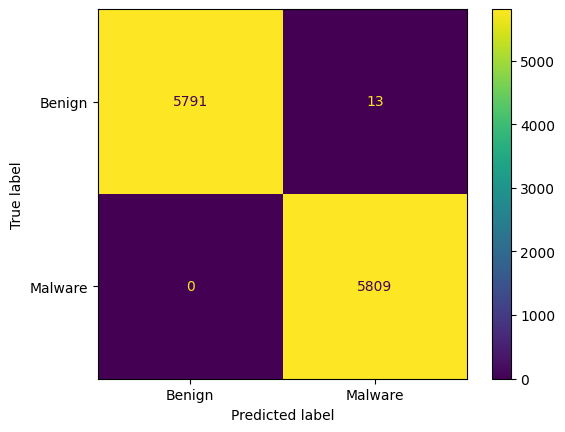

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_svm)

# Task 4-Hyperparameters Fine Tuning

<span style="color: yellow;">9 Marks, 3 marks per step from step19 to step21</span>


### 19. Use GridSearchCV to find the best value of C: [0.1, 1, 10], and print out the grid_search.best_params_

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {'kernel': ['rbf'],
                  'C': [0.1, 1 , 10]
                }

estimator = SVC()

grid_search = GridSearchCV(estimator, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_params)

{'C': 10, 'kernel': 'rbf'}


### 20. Train 2 other classifiers of your choice, one of which is a neural network.

classification_report for MLP
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5804
     Malware       1.00      1.00      1.00      5809

    accuracy                           1.00     11613
   macro avg       1.00      1.00      1.00     11613
weighted avg       1.00      1.00      1.00     11613



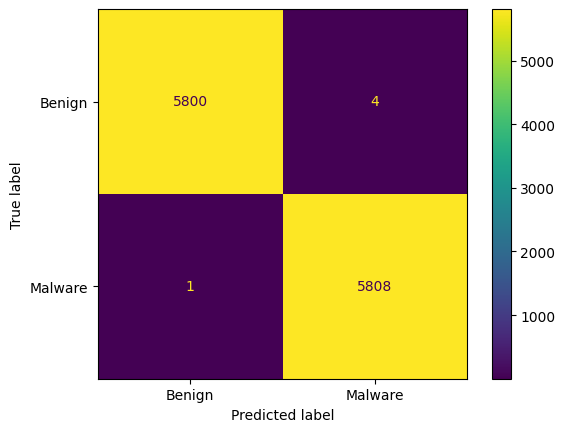

In [28]:
from sklearn.neural_network import MLPClassifier

model_mlp = MLPClassifier(
    hidden_layer_sizes=(10,),
    alpha=0.01,       
    max_iter=300,     
    random_state=42)
model_mlp.fit(X_train, y_train)
y_predict_mlp = model_mlp.predict(X_test)
print(f'classification_report for MLP')
print (classification_report(y_test, y_predict_mlp))
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_mlp)

classification_report for GBC
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5804
     Malware       1.00      1.00      1.00      5809

    accuracy                           1.00     11613
   macro avg       1.00      1.00      1.00     11613
weighted avg       1.00      1.00      1.00     11613

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5804
     Malware       1.00      1.00      1.00      5809

    accuracy                           1.00     11613
   macro avg       1.00      1.00      1.00     11613
weighted avg       1.00      1.00      1.00     11613



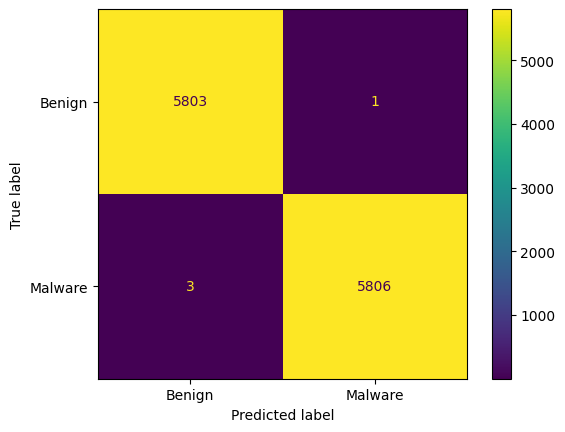

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

model_gbc = GradientBoostingClassifier(
    n_estimators=100, 
    learning_rate=1.0, 
    max_depth=1, 
    random_state=42
)
model_gbc.fit(X_train, y_train)
y_predict_gbc = model_gbc.predict(X_test)
print(f'classification_report for GBC')
print (classification_report(y_test, y_predict_gbc))
print (classification_report(y_test, y_predict_gbc))
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_gbc)

### 21. Compare the results of the three classifiers in a table. Include Accuracy, F1-Score, Precision and Recall.

The table below is showing the first row only, your table should should show three rows, one for each classifier

| Classifier | Precision | Recall | Accuracy | F1-Score |
|------------|-----------|--------|----------|----------|
|   SVC      |  1.00     | 1.00   | 1.00     | 1.00     |
|   MLP      |  1.00     | 1.00   | 1.00     | 1.00     |
|   GBC      |  1.00     | 1.00   | 1.00     | 1.00     |



# Task 5-Predict Malware Category

<span style="color: yellow;">10 Marks for step 23</span>

### 22.	Revert back to the malware_df_prepared_backup dataset you saved in step 13. 

In [30]:
malware_df_prepared = malware_df_prepared_backup.copy()

### 23.	Repeat Task 3, but this time drop Class and MalwareFamily, and use MalwareCategory as your target. 
Do it all (steps 14 to 18) in a single code cell below

(46449, 52) (46449,) (11613, 52) (11613,)
classification_report for C = 1
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5804
  Ransomware       0.59      0.55      0.57      1932
     Spyware       0.63      0.63      0.63      1982
      Trojan       0.57      0.62      0.60      1895

    accuracy                           0.80     11613
   macro avg       0.70      0.70      0.70     11613
weighted avg       0.80      0.80      0.80     11613



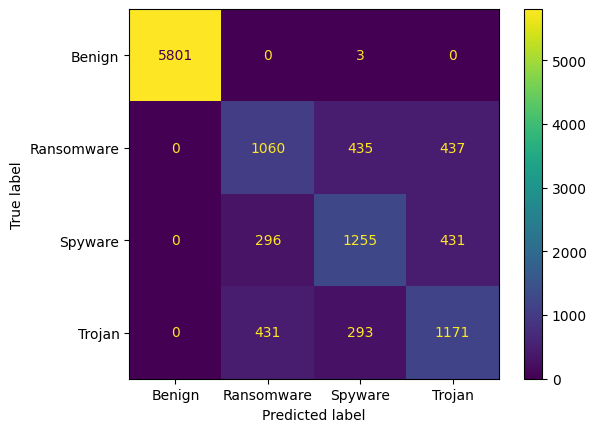

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

#Drop the MalwareFamily and MalwareCategory features, then set MalwareCategory as target
X = malware_df_prepared.drop(['MalwareFamily', 'MalwareCategory', 'Class'], axis=1)
y = malware_df_prepared['MalwareCategory']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

model_svm = SVC(kernel='rbf', C=1, gamma=1)
model_svm.fit(X_train, y_train)

y_predict_svm=model_svm.predict(X_test)
print(f'classification_report for C = 1')
print (classification_report(y_test, y_predict_svm))

ConfusionMatrixDisplay.from_predictions(y_test, y_predict_svm)

# Task 6-Predict Malware Family

<span style="color: yellow;">10 Marks for step 25</span>

### 24.	Revert back to the malware_df_prepared_backup dataset you saved in step 13. 

In [32]:
malware_df_prepared = malware_df_prepared_backup.copy()

### 25.	Repeat Task 3, but this time drop Class and MalwareCategory, and use MalwareFamily as your target.
Do it all (steps 14 to 18) in a single code cell below

(23064, 52) (23064,) (5767, 52) (5767,)
classification_report for C = 1
              precision    recall  f1-score   support

180solutions       0.24      0.24      0.24       387
         Ako       0.27      0.22      0.24       408
         CWS       0.23      0.16      0.19       394
       Conti       0.24      0.23      0.24       378
      Emotet       0.29      0.34      0.32       378
       Gator       0.47      0.47      0.47       422
        Maze       0.46      0.28      0.35       348
        Pysa       0.36      0.12      0.18       329
     Reconyc       0.36      0.27      0.31       279
     Refroso       0.38      0.55      0.45       396
        Scar       0.32      0.37      0.34       416
       Shade       0.27      0.32      0.29       405
        TIBS       0.88      0.47      0.61       300
 Transponder       0.24      0.38      0.30       500
        Zeus       0.28      0.36      0.32       427

    accuracy                           0.32      5767
   macro

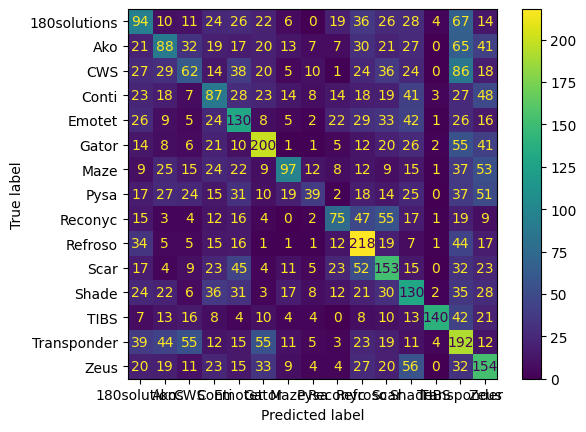

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

#Drop all samples with MalwareCategory = 'Benign'
malware_df_prepared = malware_df_prepared[malware_df_prepared['MalwareCategory'] != 'Benign']

#Drop the MalwareFamily and MalwareCategory features, then set MalwareFamily as target
X = malware_df_prepared.drop(['MalwareFamily', 'MalwareCategory', 'Class'], axis=1)
y = malware_df_prepared['MalwareFamily']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

model_svm = SVC(kernel='rbf', C=1, gamma=1)
model_svm.fit(X_train, y_train)

y_predict_svm=model_svm.predict(X_test)
print(f'classification_report for C = 1')
print (classification_report(y_test, y_predict_svm))

ConfusionMatrixDisplay.from_predictions(y_test, y_predict_svm)

### 26.	Why do you think the accuracy is this low in this task?
<span style="color: yellow;">5 Marks for step 26</span>

Because we do not have as many samples for each particular family of malware. We would need a significantly larger dataset to make this classification more accurate.

Code Quality and Style
- Code is clearly formatted and adheres to PEP 8 (or your chosen style guide). 
- Variables and functions are named descriptively.
- The code includes clear comments explaining the purpose of code blocks and non-obvious logic.
- Code is structured into modular functions where appropriate. 
- Unnecessary or redundant code is avoided.

<span style="color: yellow;">10 Marks for code quality and style</span>
